In [23]:
from tbparse import SummaryReader
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("muted")

In [24]:
ppo_results = SummaryReader("/home/isaacp/repos/EvMatsim/contribs/rlev/i-15-single-agent-results/mlp_run_complete/PPO_1").scalars

In [25]:
ppo_results.head()

,step,tag,value
0,16,Avg Charger Cost,750701568.0
1,32,Avg Charger Cost,759207104.0
2,48,Avg Charger Cost,766038848.0
3,64,Avg Charger Cost,750282496.0
4,80,Avg Charger Cost,750521728.0


In [26]:
ppo_results['tag'].unique()

array(['Avg Charger Cost', 'Avg Charger Efficiency', 'Avg Reward',
       'Avg Time Efficiency', 'Best Reward', 'time/fps',
       'train/approx_kl', 'train/clip_fraction', 'train/clip_range',
       'train/entropy_loss', 'train/explained_variance',
       'train/learning_rate', 'train/loss', 'train/policy_gradient_loss',
       'train/value_loss'], dtype=object)

In [27]:
results_keys = ["Avg Charger Cost", "Avg Charger Efficiency", "Avg Reward", "Avg Time Efficiency"]

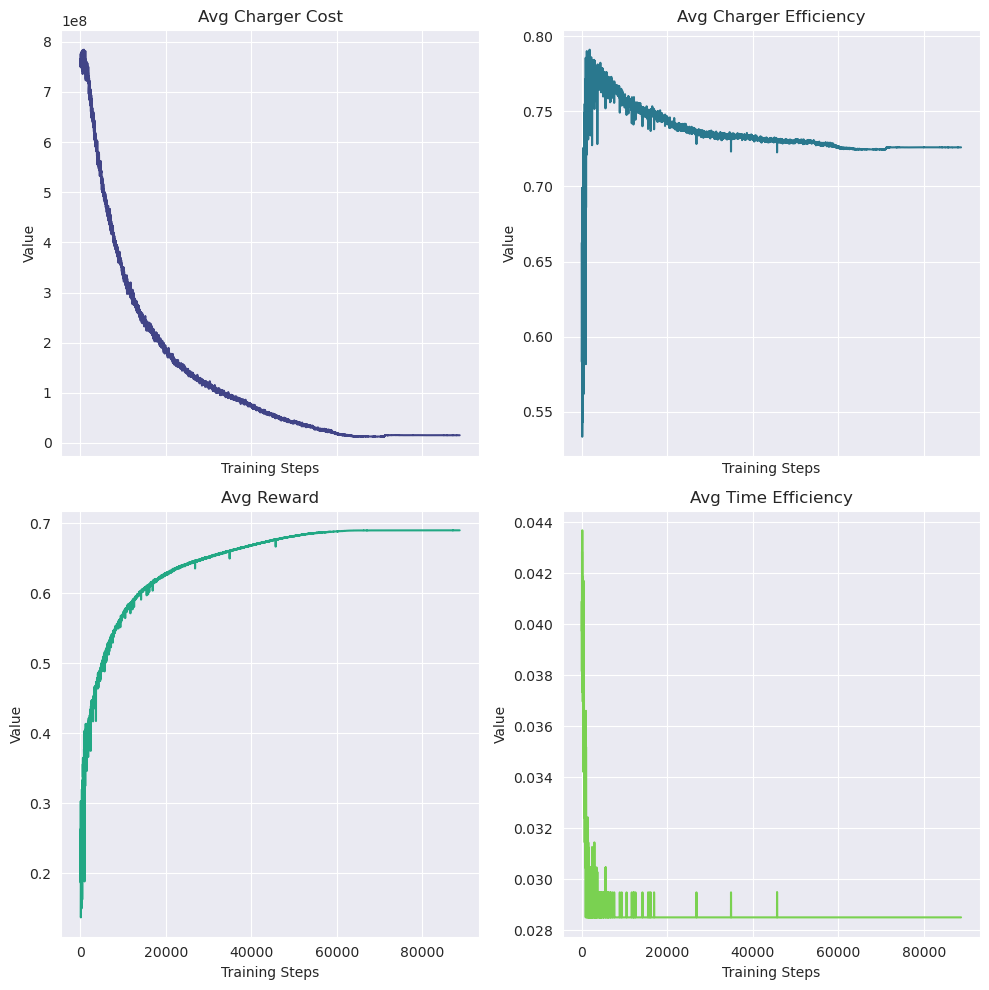

In [36]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True)
line_colors = sns.color_palette("viridis", n_colors=len(results_keys))

for i, key in enumerate(results_keys):
    ax = axs[i // 2, i % 2]
    r = ppo_results[ppo_results['tag'] == key]
    ax.plot(r['step'], r['value'], label=key, color=line_colors[i])
    ax.set_title(key)
    ax.set_xlabel("Training Steps")
    ax.set_ylabel("Value")

plt.tight_layout()
plt.savefig("./ppo_results_single_agent.pdf")